First 5 rows:
    interest_level  free_hours_per_week club_participation
0               4                   17                 no
1               6                   12                 no
2               8                   19                 no
3               6                   19                yes
4               9                   17                 no

Columns: ['interest_level', 'free_hours_per_week', 'club_participation']

Missing values:
 interest_level         0
free_hours_per_week    0
club_participation     0
dtype: int64

Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.36      0.31        11
           1       0.53      0.42      0.47        19

    accuracy                           0.40        30
   macro avg       0.40      0.39      0.39        30
weighted avg       0.44      0.40      0.41        30



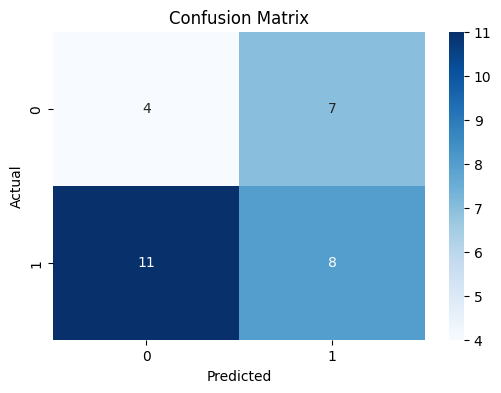


Sample student prediction (1 = Will Join, 0 = Won’t Join): 0


In [10]:
# Step 1: Install required libraries
!pip install pandas scikit-learn seaborn matplotlib --quiet  # Installing necessary libraries for data manipulation, machine learning, and visualization

# Step 2: Import libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for prediction
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

# Step 3: Load the dataset
file_path = '/content/club_participation.csv'  # Path to the CSV dataset
df = pd.read_csv(file_path)  # Reading the CSV file into a DataFrame

# Step 4: Preview the dataset
print("First 5 rows:\n", df.head())  # Displaying the first 5 rows to understand the data structure
print("\nColumns:", df.columns.tolist())  # Printing the column names to see all features

# Step 5: Check and convert target column values ('yes'/'no' → 1/0)
df['club_participation'] = df['club_participation'].map({'yes': 1, 'no': 0})  # Mapping the 'yes' and 'no' to 1 and 0 for binary classification

# Step 6: Check for missing values
print("\nMissing values:\n", df.isnull().sum())  # Checking for missing values in the dataset

# Step 7: Define features and target
X = df.drop('club_participation', axis=1)  # Features (all columns except target)
y = df['club_participation']  # Target variable (club participation)

# Step 8: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting the data into 70% training and 30% testing

# Step 9: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initializing Random Forest with 100 trees
model.fit(X_train, y_train)  # Training the model on the training data

# Step 10: Predict and evaluate
y_pred = model.predict(X_test)  # Making predictions on the test data
print("\nAccuracy:", accuracy_score(y_test, y_pred))  # Printing the accuracy score
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Printing precision, recall, and F1-score for evaluation

# Step 11: Confusion Matrix
plt.figure(figsize=(6, 4))  # Setting the figure size for the heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')  # Displaying the confusion matrix with annotations
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Showing the plot

# Step 12: Predict on new sample (adjust values as needed)
sample_input = pd.DataFrame([{
    'interest_level': 8,  # Sample value for interest level
    'free_hours_per_week': 15  # Sample value for free hours per week
}])

sample_prediction = model.predict(sample_input)[0]  # Making a prediction for the new sample
print("\nSample student prediction (1 = Will Join, 0 = Won’t Join):", sample_prediction)  # Printing the predicted result


<ipython-input-11-7f84b5cda0ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='club_participation', palette='Set2')  # Creating a count plot for club participation (0 = Did Not Join, 1 = Joined)


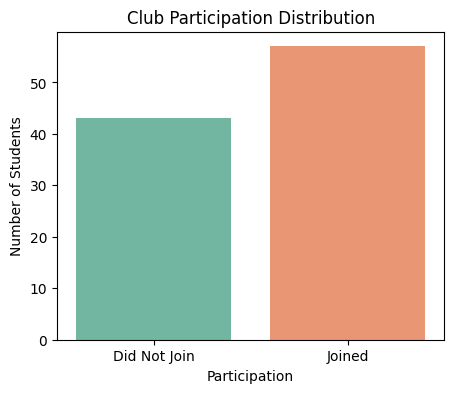

<ipython-input-11-7f84b5cda0ac>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='club_participation', y='interest_level', palette='coolwarm')  # Boxplot to visualize interest levels by participation


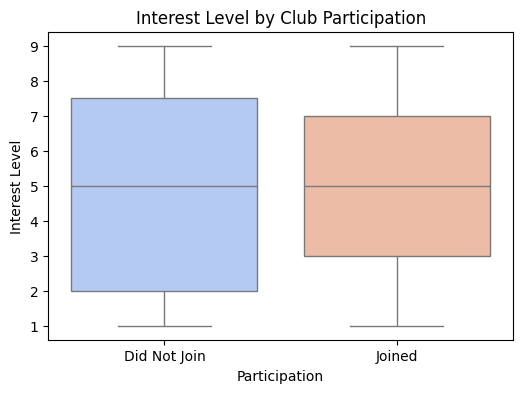

<ipython-input-11-7f84b5cda0ac>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='club_participation', y='free_hours_per_week', palette='pastel')  # Violin plot to visualize distribution of free hours per week by participation


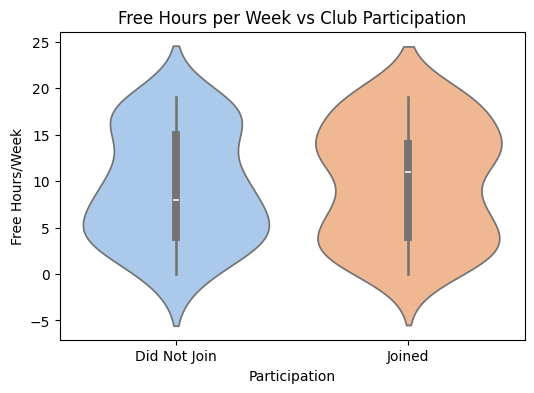

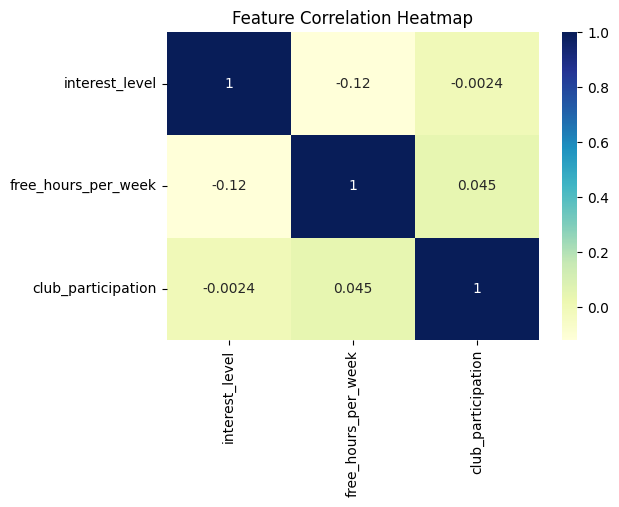

In [11]:
import matplotlib.pyplot as plt  # For data visualization using plots
import seaborn as sns  # For creating attractive and informative statistical graphics

# Ensure your data is ready
# df = ...  (should already be defined with 'club_participation' as 0/1)

# Plot 1: Distribution of club participation
plt.figure(figsize=(5, 4))  # Setting the figure size for the plot
sns.countplot(data=df, x='club_participation', palette='Set2')  # Creating a count plot for club participation (0 = Did Not Join, 1 = Joined)
plt.xticks([0, 1], ['Did Not Join', 'Joined'])  # Customizing x-axis labels
plt.title('Club Participation Distribution')  # Title of the plot
plt.xlabel('Participation')  # Label for the x-axis
plt.ylabel('Number of Students')  # Label for the y-axis
plt.show()  # Display the plot

# Plot 2: Interest level vs club participation
plt.figure(figsize=(6, 4))  # Setting the figure size for the plot
sns.boxplot(data=df, x='club_participation', y='interest_level', palette='coolwarm')  # Boxplot to visualize interest levels by participation
plt.xticks([0, 1], ['Did Not Join', 'Joined'])  # Customizing x-axis labels
plt.title('Interest Level by Club Participation')  # Title of the plot
plt.xlabel('Participation')  # Label for the x-axis
plt.ylabel('Interest Level')  # Label for the y-axis
plt.show()  # Display the plot

# Plot 3: Free hours per week vs club participation
plt.figure(figsize=(6, 4))  # Setting the figure size for the plot
sns.violinplot(data=df, x='club_participation', y='free_hours_per_week', palette='pastel')  # Violin plot to visualize distribution of free hours per week by participation
plt.xticks([0, 1], ['Did Not Join', 'Joined'])  # Customizing x-axis labels
plt.title('Free Hours per Week vs Club Participation')  # Title of the plot
plt.xlabel('Participation')  # Label for the x-axis
plt.ylabel('Free Hours/Week')  # Label for the y-axis
plt.show()  # Display the plot

# Plot 4: Correlation Heatmap
plt.figure(figsize=(6, 4))  # Setting the figure size for the plot
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')  # Heatmap to show correlations between features in the dataset
plt.title('Feature Correlation Heatmap')  # Title of the plot
plt.show()  # Display the plot
